In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

In [3]:
# Display basic info
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (49068, 10)
Columns: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group data by Date (Global analysis)
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Check for nulls
print(df.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


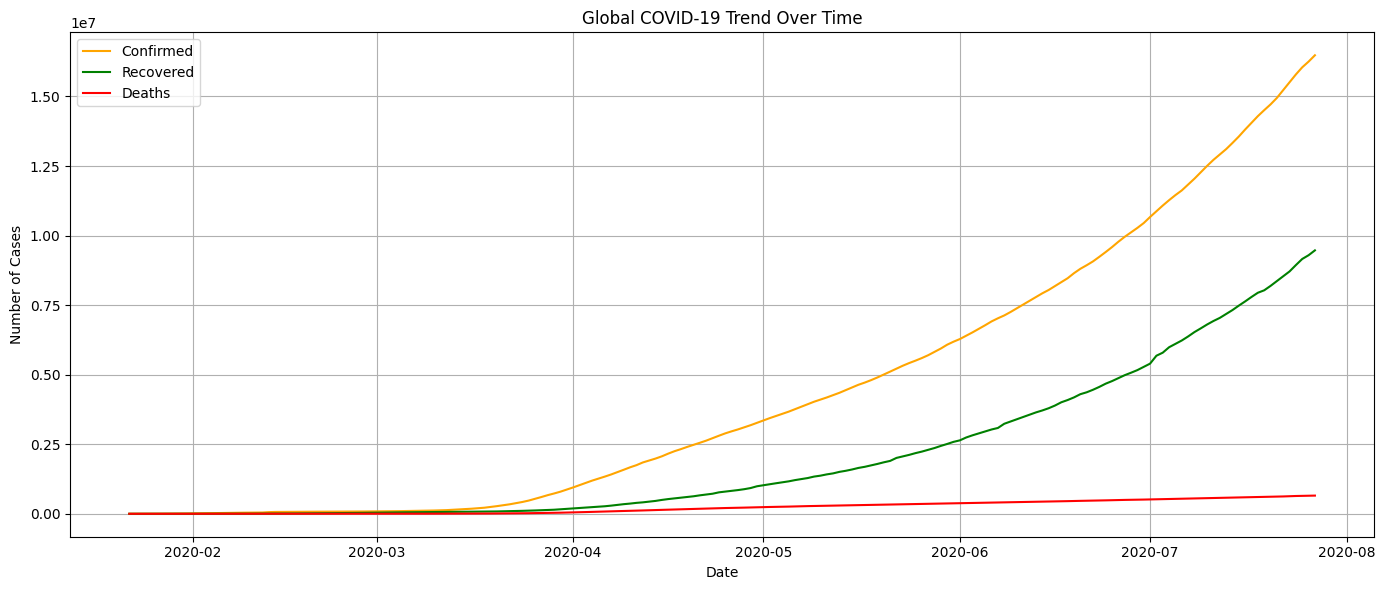

In [5]:
plt.figure(figsize=(14, 6))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed', color='orange')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered', color='green')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Trend Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

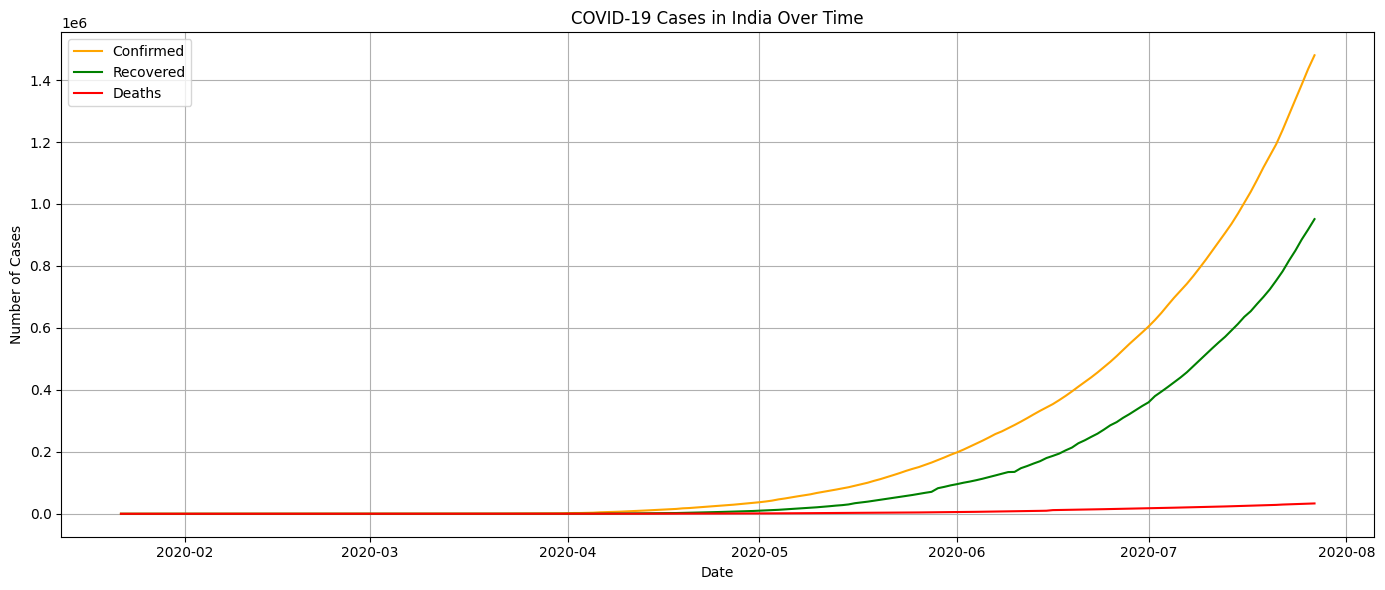

In [6]:
# Filter for India
india_df = df[df['Country/Region'] == 'India']
india_daily = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plot India trend
plt.figure(figsize=(14, 6))
plt.plot(india_daily['Date'], india_daily['Confirmed'], label='Confirmed', color='orange')
plt.plot(india_daily['Date'], india_daily['Recovered'], label='Recovered', color='green')
plt.plot(india_daily['Date'], india_daily['Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in India Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
latest = india_daily.iloc[-1]
print(f"📍 As of {latest['Date'].date()}:")
print(f"Confirmed: {int(latest['Confirmed'])}")
print(f"Recovered: {int(latest['Recovered'])}")
print(f"Deaths   : {int(latest['Deaths'])}")

📍 As of 2020-07-27:
Confirmed: 1480073
Recovered: 951166
Deaths   : 33408
